In [12]:
import numpy as np
import pandas as pd
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from matplotlib.gridspec import SubplotSpec


In [13]:
def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

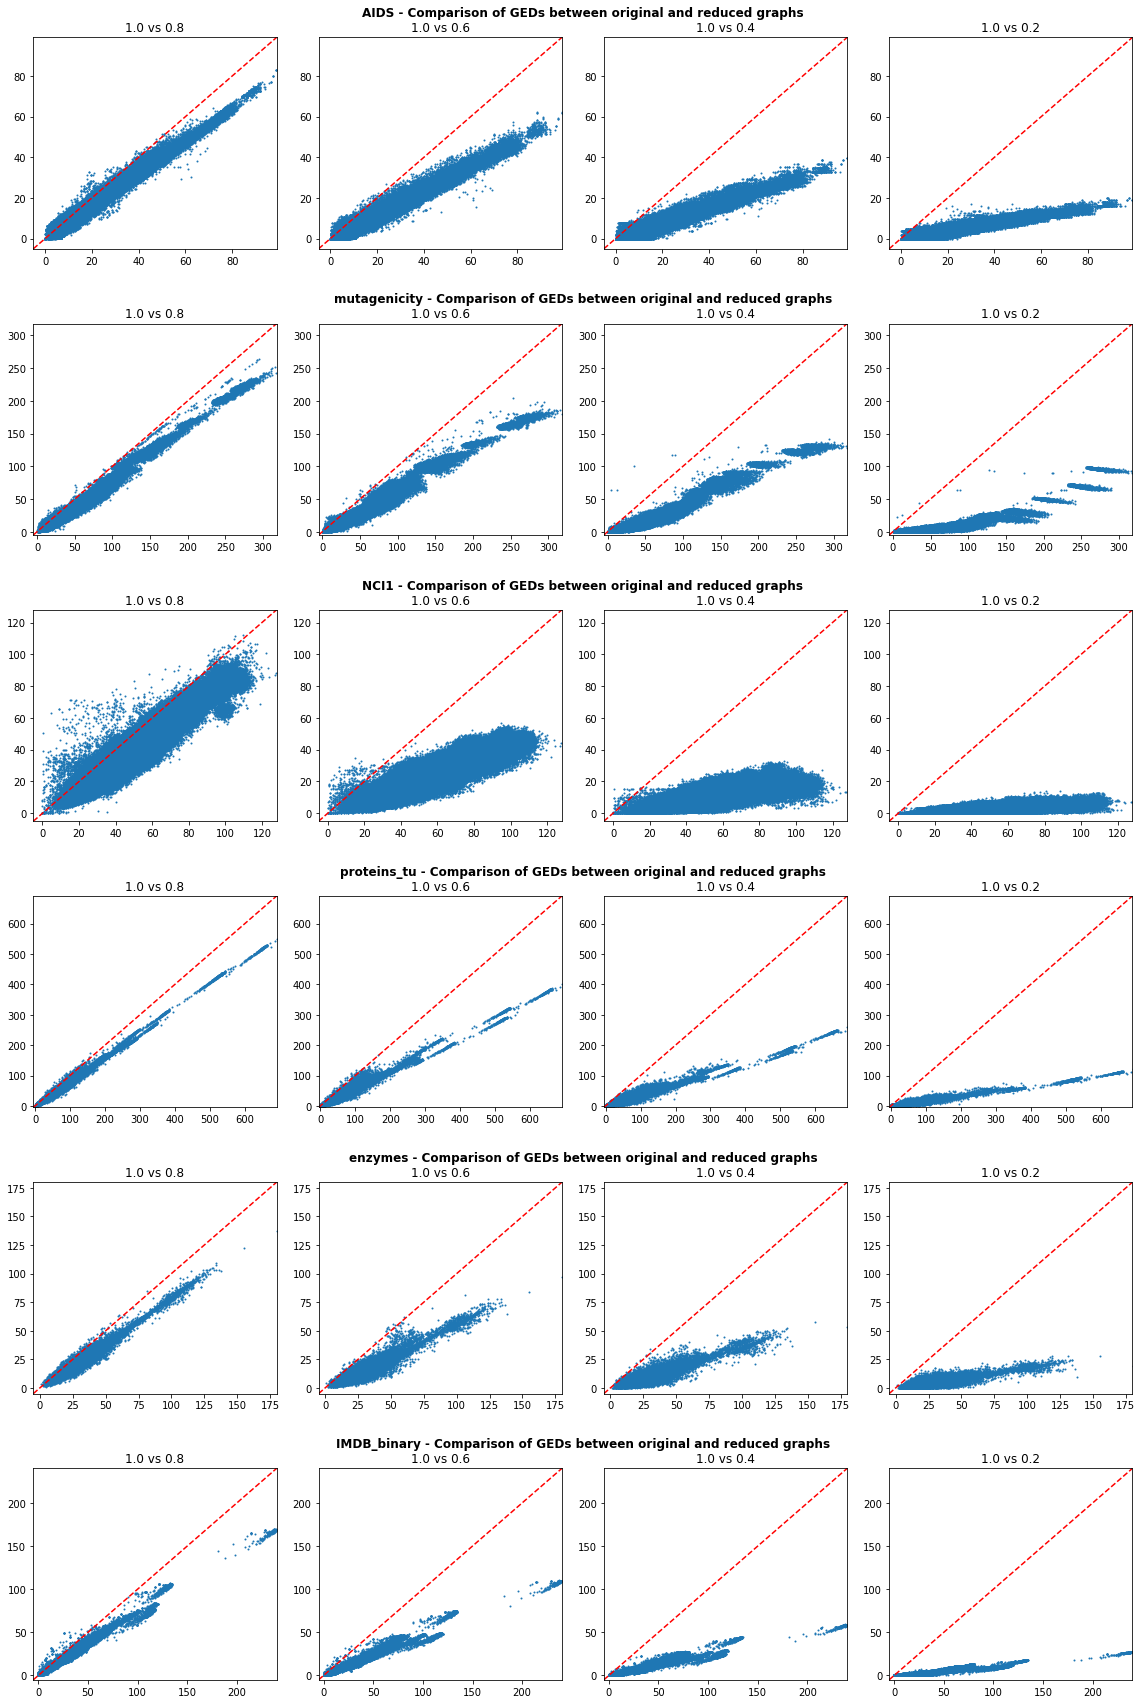

In [51]:
datasets = ['AIDS', 'mutagenicity', 'NCI1', 'proteins_tu', 'enzymes', 'IMDB_binary']
centrality_measure = 'pagerank'
lambdas = ['0.8', '0.6', '0.4', '0.2']


rows, cols = len(datasets), len(lambdas)

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4*rows))

grid = plt.GridSpec(rows, cols)

for ((idx, dataset), axes) in zip(enumerate(datasets), axs):
    folder = f'./{dataset}/distances'
    
    dist_100 = np.load(f'{folder}/{centrality_measure}_dist_1.0.npy')
    dist_100.flatten()
    max_100 = round(np.amax(dist_100))

    x = dist_100
    
    title = f'{dataset} - Comparison of GEDs between original and reduced graphs'
    create_subtitle(fig, grid[idx, ::], title)
    
    for lambda_, ax in zip(lambdas, axes):
       
        dist_comparison = np.load(f'{folder}/{centrality_measure}_dist_{lambda_}.npy')
        dist_comparison.flatten()
        max_comparison = round(np.amax(dist_comparison))
    
        ax.set_title(f'1.0 vs {lambda_}')

        y = dist_comparison
        
        ax.scatter(x.flatten(), y.flatten(), s=1)
    
        transform = ax.transAxes
        line = mlines.Line2D([0, 1], [0, 1], color='red', linestyle='--')
        line.set_transform(transform)
        ax.add_line(line)
    
        ax.set(xlim=(-5, max(max_100, max_comparison)),
               ylim=(-5, max(max_100, max_comparison)))

fig.tight_layout()
fig.savefig(f'./scatter_all_{centrality_measure}.png')

AIDS - Comparison of GEDs between original and reduced graphs
lambda: 0.8
30060 375000 8.02
lambda: 0.6
14211 375000 3.79
lambda: 0.4
7401 375000 1.97
lambda: 0.2
1941 375000 0.52
mutagenicity - Comparison of GEDs between original and reduced graphs
lambda: 0.8
13744 3505500 0.39
lambda: 0.6
2254 3505500 0.06
lambda: 0.4
93 3505500 0.0
lambda: 0.2
7 3505500 0.0
NCI1 - Comparison of GEDs between original and reduced graphs
lambda: 0.8
44190 3165000 1.4
lambda: 0.6
428 3165000 0.01
lambda: 0.4
82 3165000 0.0
lambda: 0.2
1 3165000 0.0
proteins_tu - Comparison of GEDs between original and reduced graphs
lambda: 0.8
2625 153780 1.71
lambda: 0.6
661 153780 0.43
lambda: 0.4
147 153780 0.1
lambda: 0.2
103 153780 0.07
enzymes - Comparison of GEDs between original and reduced graphs
lambda: 0.8
974 43200 2.25
lambda: 0.6
102 43200 0.24
lambda: 0.4
37 43200 0.09
lambda: 0.2
1 43200 0.0
IMDB_binary - Comparison of GEDs between original and reduced graphs
lambda: 0.8
8293 120000 6.91
lambda: 0.6
14

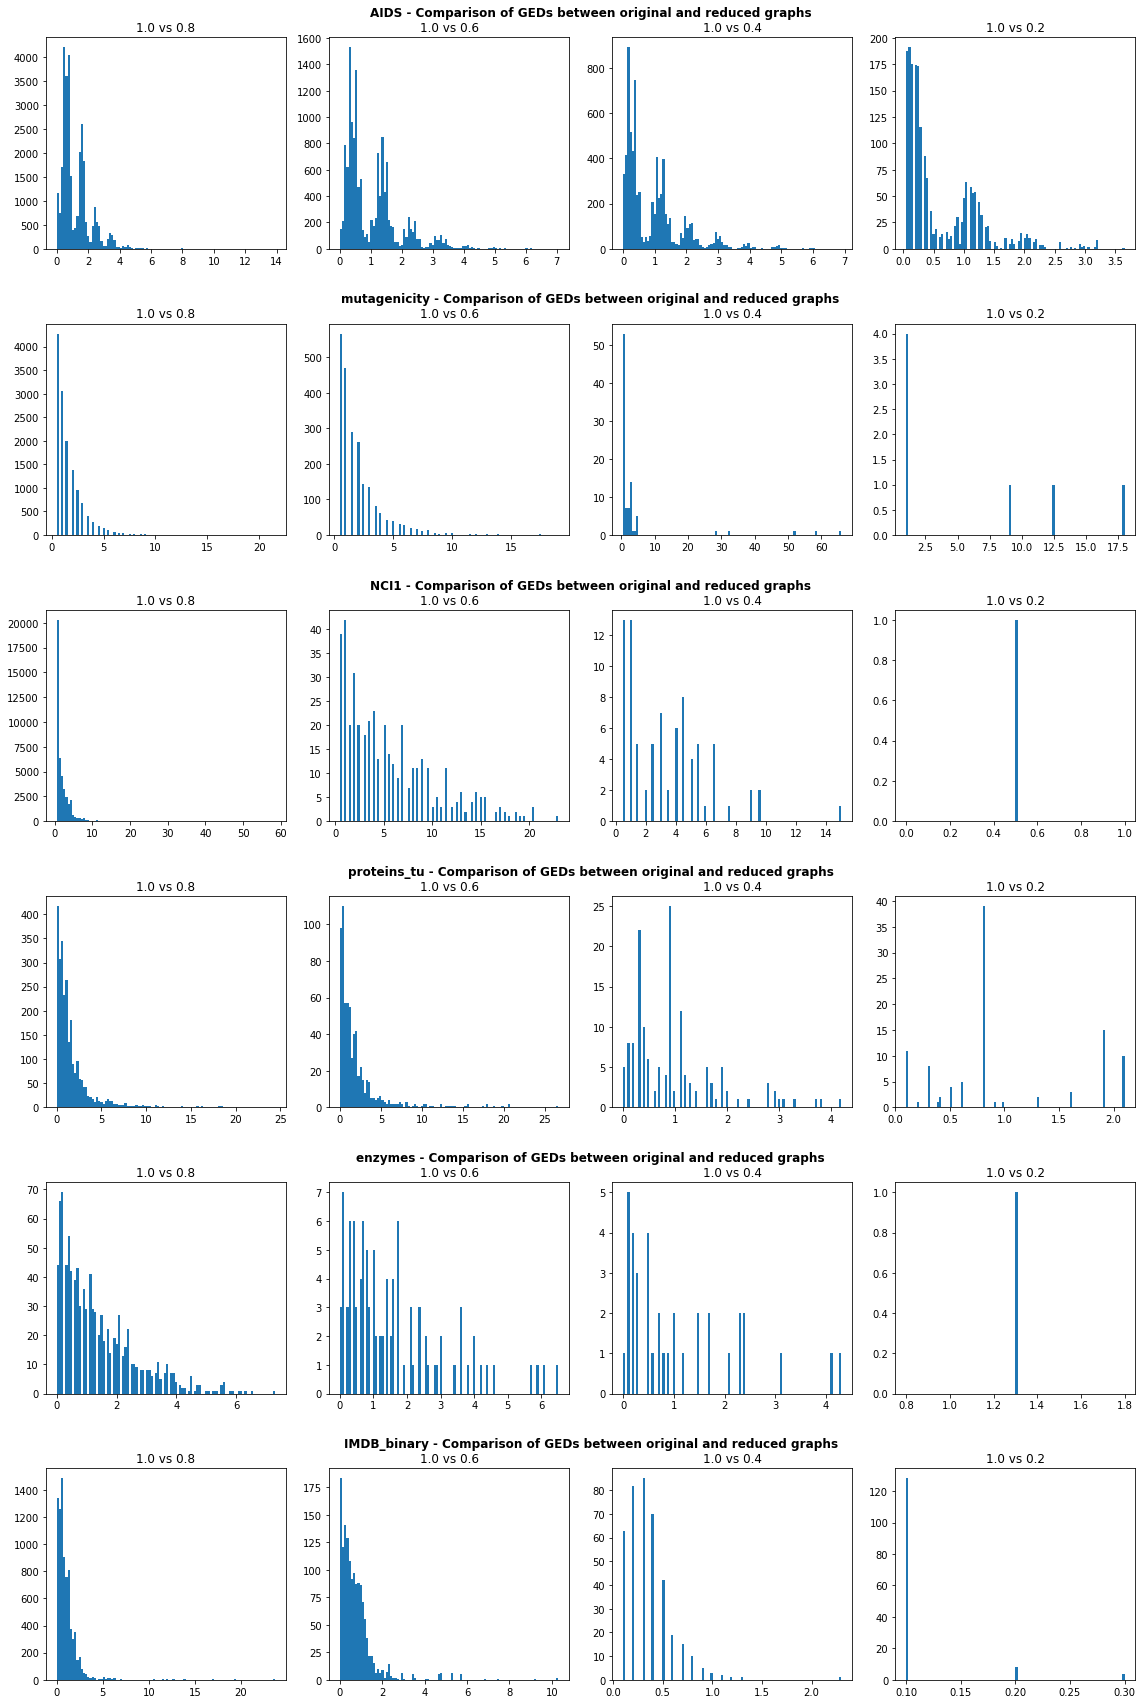

In [63]:
datasets = ['AIDS', 'mutagenicity', 'NCI1', 'proteins_tu', 'enzymes', 'IMDB_binary']
centrality_measure = 'pagerank'
lambdas = ['0.8', '0.6', '0.4', '0.2']


rows, cols = len(datasets), len(lambdas)

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4*rows))

grid = plt.GridSpec(rows, cols)

for ((idx, dataset), axes) in zip(enumerate(datasets), axs):
    folder = f'./{dataset}/distances'
    
    dist_100 = np.load(f'{folder}/{centrality_measure}_dist_1.0.npy')
    dist_100.flatten()
    max_100 = round(np.amax(dist_100))

    x = dist_100
    
    title = f'{dataset} - Comparison of GEDs between original and reduced graphs'
    create_subtitle(fig, grid[idx, ::], title)
    print(title)
    
    for lambda_, ax in zip(lambdas, axes):
       
        dist_comparison = np.load(f'{folder}/{centrality_measure}_dist_{lambda_}.npy')
        dist_comparison.flatten()
        max_comparison = round(np.amax(dist_comparison))
        
        
        ax_title = f'1.0 vs {lambda_}'
        ax.set_title(ax_title)

        y = dist_comparison
        
        print(f'lambda: {lambda_}')

        counter = 0
        max_val = float('-inf')
        diffs = []
        for idx, (x_row, y_row) in enumerate(zip(x, y)):
            for idx_col, (x_v, y_v) in enumerate(zip(x_row, y_row)):
                
                diff_val = y_v - x_v
                if diff_val > 0:
                    diffs.append(diff_val)
                    
                if diff_val > max_val and diff_val > 0:
                    max_val = diff_val
#                     print('#####')
#                     print(max_val)
#                     print(idx, idx_col, x_v, y_v)
                if x_v < y_v:
#                 print(idx, x_v, y_v)
                    counter += 1
    
        print(counter, len(x.flatten()), round(100 * counter / len(x.flatten()), 2))
        ax.hist(diffs, bins=100)
#     print(diffs)
fig.tight_layout()

AIDS - Comparison of GEDs between original and reduced graphs
lambda: 0.8
30060 375000 8.02
lambda: 0.6
14211 375000 3.79
lambda: 0.4
7401 375000 1.97
lambda: 0.2
1941 375000 0.52
mutagenicity - Comparison of GEDs between original and reduced graphs
lambda: 0.8
13744 3505500 0.39
lambda: 0.6
2254 3505500 0.06
lambda: 0.4
93 3505500 0.0
lambda: 0.2
7 3505500 0.0
NCI1 - Comparison of GEDs between original and reduced graphs
lambda: 0.8
44190 3165000 1.4
lambda: 0.6
428 3165000 0.01
lambda: 0.4
82 3165000 0.0
lambda: 0.2
1 3165000 0.0
proteins_tu - Comparison of GEDs between original and reduced graphs
lambda: 0.8
2625 153780 1.71
lambda: 0.6
661 153780 0.43
lambda: 0.4
147 153780 0.1
lambda: 0.2
103 153780 0.07
enzymes - Comparison of GEDs between original and reduced graphs
lambda: 0.8
974 43200 2.25
lambda: 0.6
102 43200 0.24
lambda: 0.4
37 43200 0.09
lambda: 0.2
1 43200 0.0
IMDB_binary - Comparison of GEDs between original and reduced graphs
lambda: 0.8
8293 120000 6.91
lambda: 0.6
14

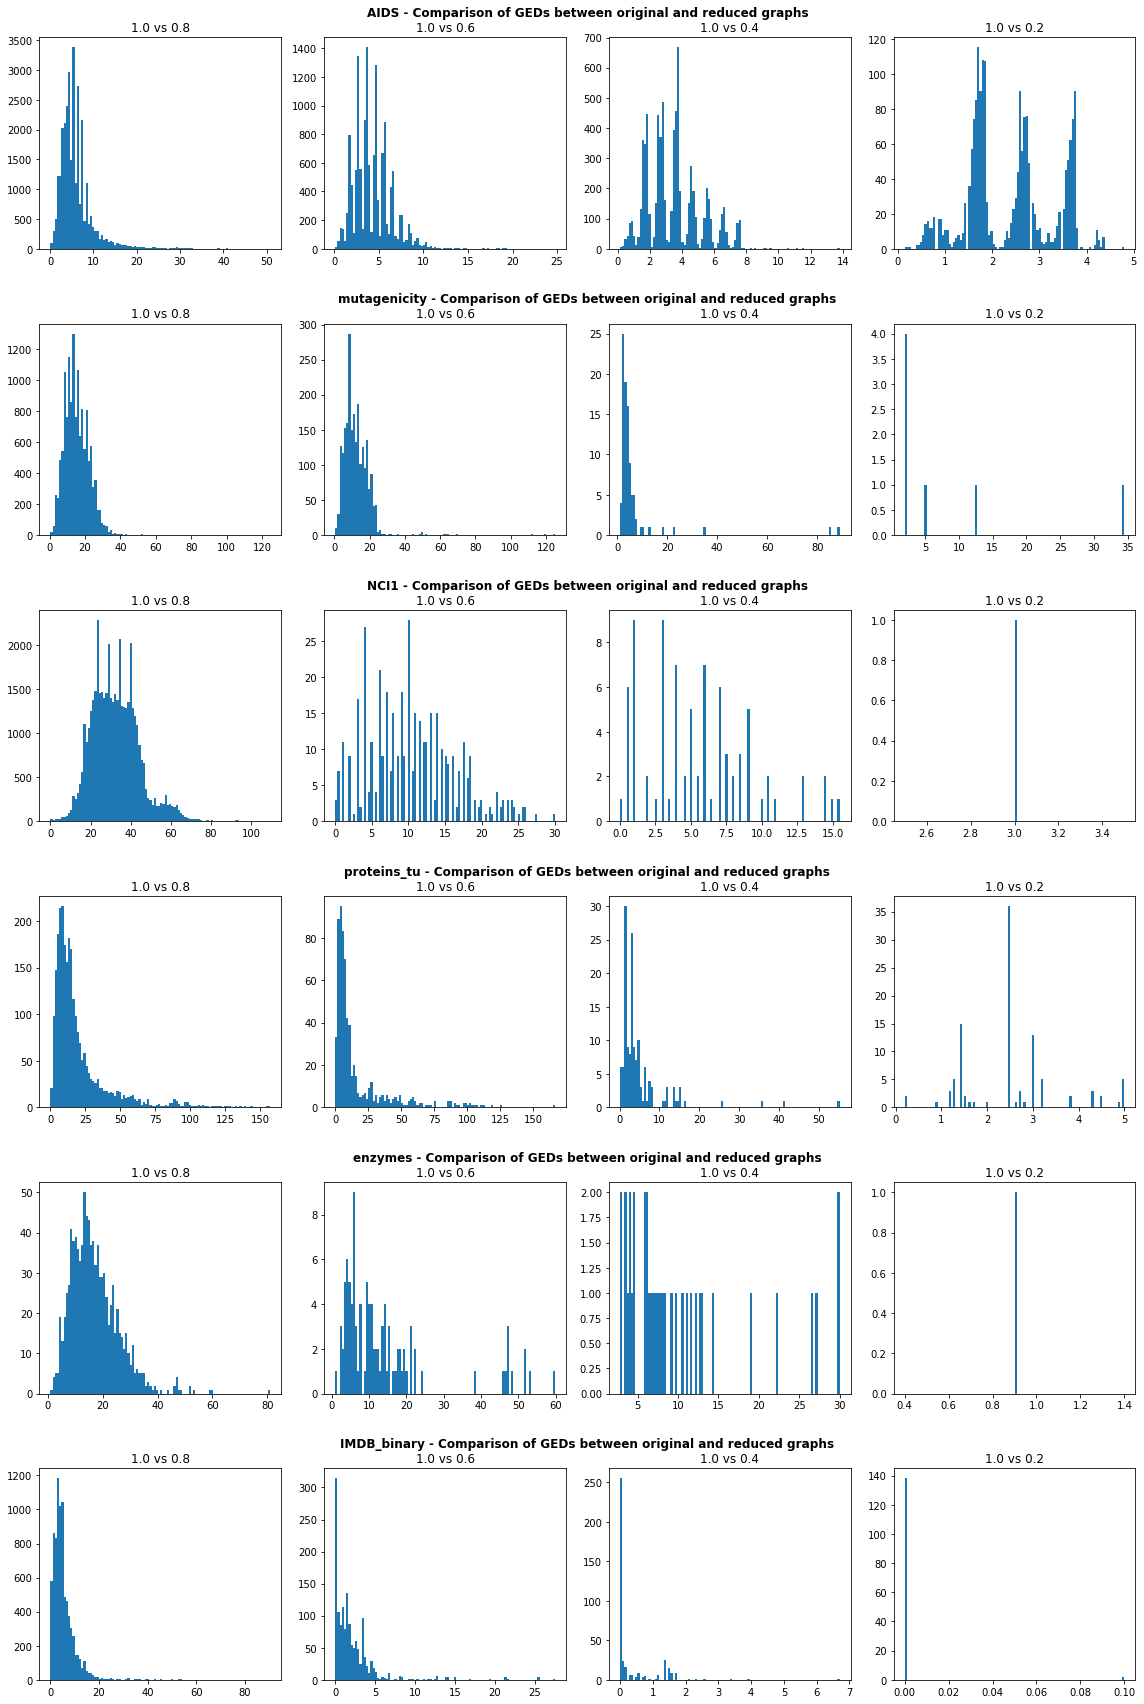

In [64]:
datasets = ['AIDS', 'mutagenicity', 'NCI1', 'proteins_tu', 'enzymes', 'IMDB_binary']
centrality_measure = 'pagerank'
lambdas = ['0.8', '0.6', '0.4', '0.2']


rows, cols = len(datasets), len(lambdas)

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4*rows))

grid = plt.GridSpec(rows, cols)

for ((idx, dataset), axes) in zip(enumerate(datasets), axs):
    folder = f'./{dataset}/distances'
    
    dist_100 = np.load(f'{folder}/{centrality_measure}_dist_1.0.npy')
    dist_100.flatten()
    max_100 = round(np.amax(dist_100))

    x = dist_100
    
    title = f'{dataset} - Comparison of GEDs between original and reduced graphs'
    create_subtitle(fig, grid[idx, ::], title)
    print(title)
    
    for lambda_, ax in zip(lambdas, axes):
       
        dist_comparison = np.load(f'{folder}/{centrality_measure}_dist_{lambda_}.npy')
        dist_comparison.flatten()
        max_comparison = round(np.amax(dist_comparison))
        
        
        ax_title = f'1.0 vs {lambda_}'
        ax.set_title(ax_title)

        y = dist_comparison
        
#         print(f'lambda: {lambda_}')

        counter = 0
        max_val = float('-inf')
        diffs = []
        for idx, (x_row, y_row) in enumerate(zip(x, y)):
            for idx_col, (x_v, y_v) in enumerate(zip(x_row, y_row)):
                
                diff_val = y_v - x_v
                if diff_val > 0:
                    diffs.append(x_v)
                    
                if x_v < y_v:
                    counter += 1
    
#         print(counter, len(x.flatten()), round(100 * counter / len(x.flatten()), 2))
        ax.hist(diffs, bins=100)
#     print(diffs)
fig.tight_layout()

[1.0, 0.8, 0.6, 0.4, 0.2]
[9.93134031 7.24591274 5.59345102 3.99933646 2.77533822]
[0.34955348 0.41895567 0.17611334 0.1859977  0.29570809]
[0.25005549 0.29970283 0.12598389 0.13305474 0.21153683]
[1.0, 0.8, 0.6, 0.4, 0.2]
[63.27301612 46.08233638 33.23207245 21.91217828 15.18022227]
[2.26899866 2.16225559 1.33166161 0.76466738 1.00222168]
[1.62314386 1.54678447 0.95261333 0.54701009 0.7169462 ]
[1.0, 0.8, 0.6, 0.4, 0.2]
[51.41116519 36.71900456 25.85163004 17.8935591  12.61515074]
[1.54359443 1.33459684 0.98968374 0.95693083 1.23664953]
[1.10422093 0.95471307 0.7079771  0.68454708 0.88464578]
[1.0, 0.8, 0.6, 0.4, 0.2]
[7.08575077 4.66518252 3.08542619 2.02077084 1.18182299]
[0.51970886 0.35583434 0.21870273 0.29079662 0.34015645]
[0.37177732 0.25454855 0.15645051 0.20802337 0.24333327]
[1.0, 0.8, 0.6, 0.4, 0.2]
[2.17835753 1.40920725 1.11280258 0.60867305 0.35161898]
[0.14303788 0.13820834 0.20104437 0.05678131 0.07492617]
[0.10232314 0.09886829 0.14381848 0.0406189  0.05359895]
[1.0,

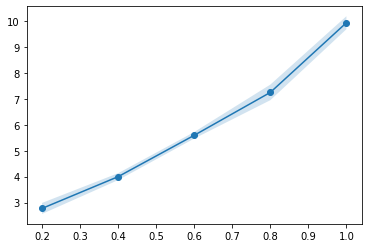

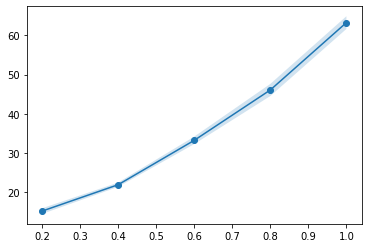

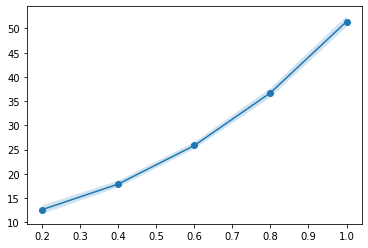

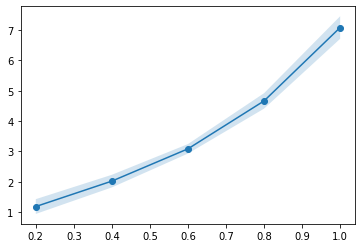

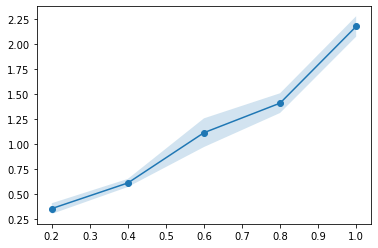

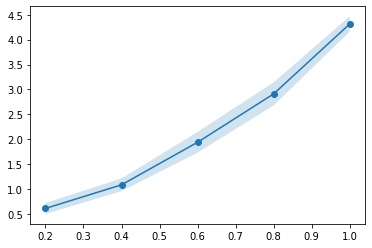

In [16]:
datasets = ['AIDS', 'mutagenicity', 'NCI1', 'proteins_tu', 'enzymes', 'IMDB_binary']
centrality_measure = 'pagerank'

confidence = 0.95


for dataset in datasets:
    filename = f'./{dataset}/time.csv'
    
    df = pd.read_csv(filename)
    df.drop(columns=df.columns[0],
           axis=1,
           inplace=True)
#     df = df.iloc[:, ::-1]
    
    
    head = [float(val) for val in df.head(0).columns]
    print(head)
    
    computation_times = np.array(df.values)
    num_samples, _ = computation_times.shape
    
    computation_times_AVERAGE = np.average(computation_times, axis=0)
    computation_times_STDEV = np.std(computation_times, axis=0, ddof=1)
    coeff = st.t.ppf((1 + confidence) / 2., num_samples-1)
    
    computation_times_CONF_INT = coeff * computation_times_STDEV / np.sqrt(num_samples)

#     print(df)
    print(computation_times_AVERAGE)
    print(computation_times_STDEV)
    print(computation_times_CONF_INT)
    fig, ax = plt.subplots()
    x = head
    y = computation_times_AVERAGE
    y_err = computation_times_CONF_INT
    
    ax.plot(head, computation_times_AVERAGE, '-')
    ax.fill_between(x, y - y_err, y + y_err, alpha=0.2)
    ax.plot(x, y, 'o', color='tab:blue')

    